# Chi-Squared Analysis

First Question Did more women and schildren surive compared to men?

Dataset from Canvas (Titanic Passenger List.csv )

In [3]:
import pandas as pd
passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')
passenger_df.head()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


### What kind of data is the dependent variable?

- What kind of data is the gender (independent variable)?
    - nominal

Two Types:
- Ordinal data: data that can be ordered
- Categorical/nominal: data that cannot be ordered

In [4]:
# Margins = True will show the summary
contingency_table = pd.crosstab(passenger_df['Gender'], passenger_df['Lived_Died'], margins=True)
print(type(contingency_table))
print(contingency_table)

<class 'pandas.core.frame.DataFrame'>
Lived_Died  died  lived   All
Gender                       
Female       143    339   482
Male         709    161   870
All          852    500  1352


In [5]:
# Task: Create a stacked bar chart showing the number of passengers by gender that lived or died
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Text(0, 0.5, 'Count')

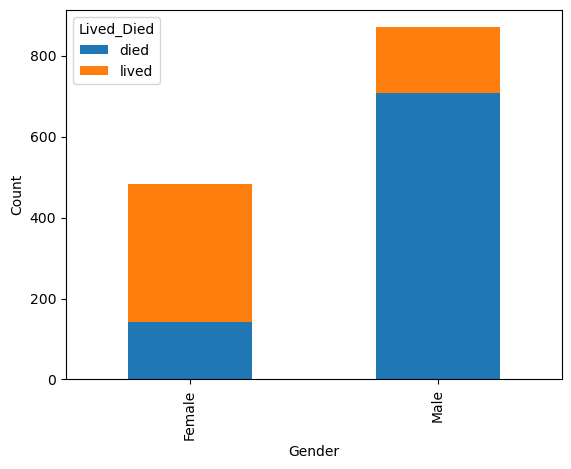

In [6]:
# First, get the number of records. get count of male and female
# we have this already from the crosstab so moving on

# Second, chart.
#plt.figure(figsize=(16,6))
#sns.barplot(x=contingency_table['died'], y=ign_df.index)

# slicing method: 
contingency_table.iloc[:-1, :-1].plot(kind='bar', stacked=True)
plt.ylabel('Count')

In [7]:
from scipy import stats # for chi2_contingency
import numpy as np

print(stats.chi2_contingency(contingency_table)[0:3])

# you get 3 values back:
# 1. Chi-Squared: the higher the chi-squared statistic, the lower likelihood that the observed values were the result of pure change.
# 2. Target P-Value
# 3. Degrees of Freedom: 1 degree of freedom (r rows -1) * (r columns - 1) = 1

(357.46388275678464, 4.288736706217388e-76, 4)


## Chi-Square Example: Was Age relevant?

In [20]:
# Check the age column. Already is fixed for the age at the time of the incident
#passenger_df.tail()

# take care of null values

#passenger_df_2 = passenger_df.loc[passenger_df['Age'] > 5]

passenger_df_nulls = passenger_df.loc[pd.isna(passenger_df['Age'])]
passenger_df_nulls

# drop null values
passenger_df


# Create the bins
passenger_df['Age_Bins'] = pd.cut(x=passenger_df['Age'], bins=range(0,90,10))#[0, 10, 20, 30, 40, 50, 60, 70, 80])

contingency_table = pd.crosstab(passenger_df['Age_Bins'], passenger_df['Lived_Died'])
#contingency_table
# plot it yay
#contingency_table.plot(kind='bar')
print(contingency_table)
print(f'Chi2-Stats {stats.chi2_contingency(contingency_table)[0:3]}')

Lived_Died  died  lived
Age_Bins               
(0, 10]       46     54
(10, 20]     156     71
(20, 30]     286    166
(30, 40]     158    107
(40, 50]     111     64
(50, 60]      40     30
(60, 70]      27      7
(70, 80]       5      0
Chi2-Stats (24.465546982751874, 0.0009433264132943263, 7)


In [9]:
#passenger_df.groupby(['Age_Bins', 'Lived_Died'])

# create a heatmap

# use a pivot table

# Chi Squared Continued
10/28/2024

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [55]:
# load data
passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')

#passengers_df.columns

# drop columns not needed
passengers_df.drop(['Name','Born','Died','Fare','Fare_decimal', 'Passenger_Class'], axis=1, inplace=True)
# drop null values
passengers_df.dropna(inplace=True)

C:\Users\K\AppData\Local\Temp\ipykernel_22656\3929710481.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(passengers_df, values='Lived_Died_int', index=['Gender'], columns = ['Age_Bins']) # use a pivottable
C:\Users\K\AppData\Local\Temp\ipykernel_22656\3929710481.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table.applymap(lambda x: 1-x) #invert values in heatmap


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, '0-9'),
  Text(1.5, 0, '10-19'),
  Text(2.5, 0, '20-29'),
  Text(3.5, 0, '30-39'),
  Text(4.5, 0, '40-49'),
  Text(5.5, 0, '50-59'),
  Text(6.5, 0, '60-6970-79')])

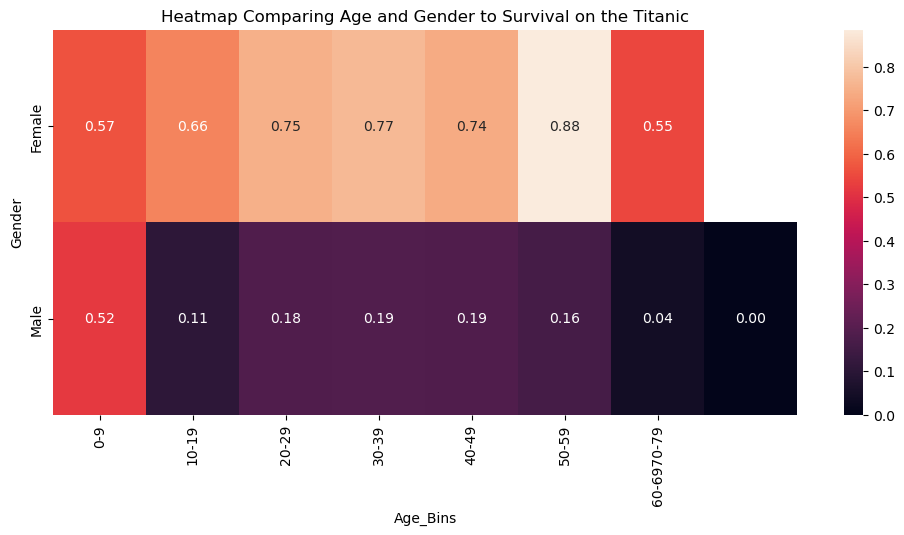

In [58]:
# encode the categorical data
le = preprocessing.LabelEncoder()
#le
passengers_df['Lived_Died_int'] = le.fit_transform(passengers_df['Lived_Died'])
passengers_df['Age_Bins'] = pd.cut(x=passengers_df['Age'], bins=range(0,90,10))

pivot_table = pd.pivot_table(passengers_df, values='Lived_Died_int', index=['Gender'], columns = ['Age_Bins']) # use a pivottable
pivot_table.applymap(lambda x: 1-x) #invert values in heatmap
# create a heatmap
plt.figure(figsize=(12,5))
x_axis_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69' '70-79']
sns.heatmap(pivot_table, annot=True, yticklabels=['Female', 'Male'], xticklabels=x_axis_labels, fmt='.2f', cmap='rocket')
plt.title('Heatmap Comparing Age and Gender to Survival on the Titanic')
plt.xticks(rotation=90)

## TASK: Did the Titanic Passenger Class Affect Survivorship?

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from scipy import stats # for chi2_contingency

passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')

passengers_df.head()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


(104.05195288933228, 3.576904106119129e-20, 6)


<Axes: xlabel='Lived_Died'>

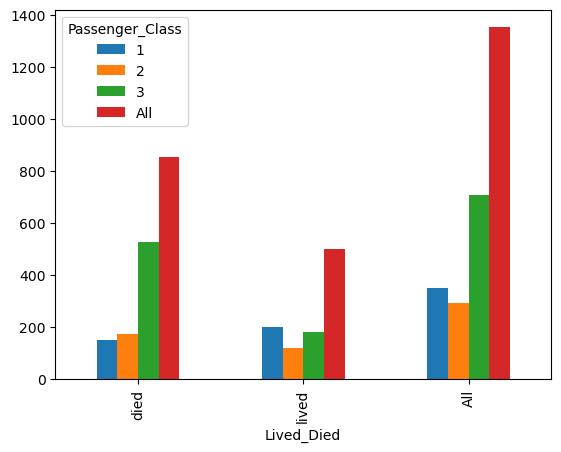

In [68]:
# Create a contingency table
contingency_table = pd.crosstab(passengers_df['Lived_Died'], passenger_df['Passenger_Class'], margins=True)
print(stats.chi2_contingency(contingency_table)[0:3])
# Create a Bar Plot with the data stacked

contingency_table.plot(kind='bar')


In [72]:
contingency_table = pd.crosstab(passengers_df['Passenger_Class'], passenger_df['Lived_Died'], margins=False)
stats.chi2_contingency(contingency_table)[0:3]

# question from me: why does margins=True have 6 degrees of freedom while margins=False only have 2?

(104.05195288933228, 2.543346399916496e-23, 2)

Which passenger class is responsible for the significant difference in survival rate?
- Chi-square test offers that at least `one` of the passenger class is different from what we would expect if the variables were independent
- Since this is our first test, it is considered a `Priori Test`
- To continue our analysis, we will run another test, a `Post Hoc` test

### Post-Hoc Test (Fisher's Exact Test)

- Compared every passenger class to every other class to see if there is statistial significance between the two.
- We could apply a `Chi-square` test for each of the three separate comparison, but our sample data in too small.
- In this case, `Fisher's Exact` test is a better option.

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from scipy import stats # for chi2_contingency

passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')

contingency_table = pd.crosstab(passengers_df['Passenger_Class'], passenger_df['Lived_Died'], margins=False)
contingency_table

Lived_Died,died,lived
Passenger_Class,,
1,149,201
2,175,118
3,528,181


In [74]:
first_class = contingency_table.iloc[0].values # extract row values
second_class = contingency_table.iloc[1].values # extract row vals
third_class = contingency_table.iloc[2].values # extract row vals
# Create a Fisher's Exact test to determine if there is a relationship between passenger classes and survival
odsratio, pvalue = stats.fisher_exact([first_class, second_class])
print(f'Fishers Exact Test for First and Second Class: {pvalue}')
odsratio, pvalue = stats.fisher_exact([first_class, third_class])
print(f'Fishers Exact Test for First and Third Class: {pvalue}')
odsratio, pvalue = stats.fisher_exact([second_class, third_class])
print(f'Fishers Exact Test for Second and Third Class: {pvalue}')

Fishers Exact Test for First and Second Class: 1.827149276703859e-05
Fishers Exact Test for First and Third Class: 7.457205699022123e-24
Fishers Exact Test for Second and Third Class: 5.007621820657881e-06


Each of the Fisher's Test reveals statistical significance

Another way to conceptualize the result is to look at percentages:

| Passenger Class | Died |
|-----------------|------|
| First Class     | 43%  |
| Second Class    | 60%  |
| Third Class     | 74%  |

TODO: Create a heatmap of Passenger Class split in Age_ranges and by Gender and Survival Rates

In [76]:
# load data
passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')

#passengers_df.columns

# drop columns not needed
passengers_df.drop(['Name','Born','Died','Fare','Fare_decimal'], axis=1, inplace=True)
# drop null values
passengers_df.dropna(inplace=True)
le = preprocessing.LabelEncoder()
passengers_df['Lived_Died_int'] = le.fit_transform(passengers_df['Lived_Died'])
passengers_df['Age_Bins'] = pd.cut(x=passengers_df['Age'], bins=range(0,90,10))

pivot_table = pd.pivot_table(passengers_df, values='Lived_Died_int', index=['Gender'], columns = ['Age_Bins']) # use a pivottable
pivot_table.applymap(lambda x: 1-x) #invert values in heatmap

# the only new code: create a heatmap

plt.figure(figsize=(16,5))
x_axis_labels = [
    'PC 1: 0-9', 'PC 1: 10-19', 'PC 1: 20-29', 'PC 1: 30-39', 'PC 1: 40-49', 'PC 1: 50-59', 'PC 1: 60-69', 'PC 1: 70-79',
    'PC 2: 0-9', 'PC 2: 10-19', 'PC 2: 20-29', 'PC 2: 30-39', 'PC 2: 40-49', 'PC 2: 50-59', 'PC 2: 60-69', 'PC 2: 70-79',
    'PC 3: 0-9', 'PC 3: 10-19', 'PC 3: 20-29', 'PC 3: 30-39', 'PC 3: 40-49', 'PC 3: 50-59', 'PC 3: 60-69', 'PC 3: 70-79'
]


C:\Users\K\AppData\Local\Temp\ipykernel_22656\2881265126.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(passengers_df, values='Lived_Died_int', index=['Gender'], columns = ['Age_Bins']) # use a pivottable
C:\Users\K\AppData\Local\Temp\ipykernel_22656\2881265126.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table.applymap(lambda x: 1-x) #invert values in heatmap


<Figure size 1600x500 with 0 Axes>

### T-Test: Fare and Gender

While Chi-Test and Fisher-Test focus on categorical discrete dependent variable, the T-Test and ANOVA test target continuous data

#### How was Fare (price of passage) affected by Gender and Passenger class?
- Did 1 gender pay more than the otheer?
- Is there a difference in fare btwn passenger classes?
- Is there an interaction btwn gender and passenger class on the resulting fare?

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from scipy import stats # for chi2_contingency

passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')

passengers_df.head()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


Text(0.5, 1.0, 'Amount of Fare Paid Based on Gender')

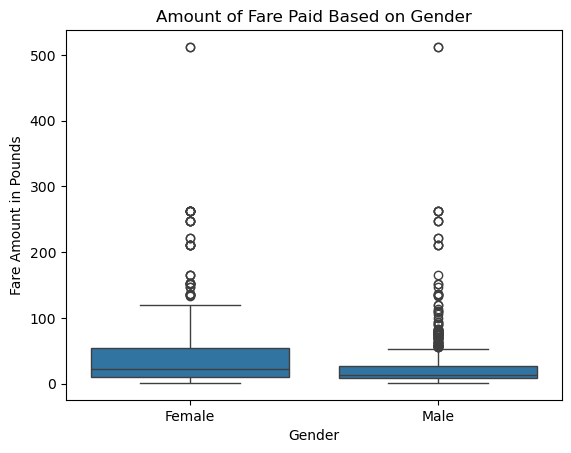

In [79]:
# visualize data using boxplot
sns.boxplot(y = passengers_df['Fare_decimal'], x = passengers_df['Gender'])
plt.ylabel('Fare Amount in Pounds')
plt.title('Amount of Fare Paid Based on Gender')

In [81]:
male = passengers_df[passengers_df['Gender'] == 'Male']
print(f'Male Summary \n{male['Fare_decimal'].describe()}')

Male Summary 
count    839.000000
mean      26.226067
std       42.514485
min        1.000000
25%        7.895000
50%       12.350000
75%       26.550000
max      512.330000
Name: Fare_decimal, dtype: float64


In [82]:
female = passengers_df[passengers_df['Gender'] == 'Female']
print(f'Female Summary \n{female['Fare_decimal'].describe()}')

Female Summary 
count    482.000000
mean      45.118299
std       63.149875
min        1.000000
25%       10.460000
50%       21.555000
75%       54.525000
max      512.330000
Name: Fare_decimal, dtype: float64


In [ ]:
from scipy.stats import ttest_ind
passengers_df.dropna(inplace=True)
male = passengers_df[passengers_df['Gender'] == 'Male']
female = passengers_df[passengers_df['Gender'] == 'Female']
# run test
statistics, pvalue = ttest_ind(male['Fare_decimal'], female['Fare_decimal'])
print(f'T-Test for Fare Paid p-value{pvalue}')